In [1]:
import numpy as np
import pandas as pd

In [2]:
# Trainingsdatensatz laden
df_train = pd.read_csv("archive/train.csv", index_col=0)

In [3]:
# Trainigsdaten anzeigen
df_train.head(10)

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before the...
7,0,@user camping tomorrow @user @user @user @use...
8,0,the next school year is the year for exams.ð...
9,0,we won!!! love the land!!! #allin #cavs #champ...


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31962 entries, 1 to 31962
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 749.1+ KB


In [5]:
df_train.shape

(31962, 2)

In [6]:
# Spalte erweitern
pd.set_option('display.max_colwidth', None)

In [7]:
# Verteilung von label
df_train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [8]:
# Werte für 0 anzeigen
df_train[df_train['label'] == 0]. head(30)

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
3,0,bihday your majesty
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦


In [9]:
# Werte für 1 anzeigen
df_train[df_train['label'] == 1]. head(30)

,label,tweet
id,,
14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
18,1,retweet if you agree!
24,1,@user @user lumpy says i am a . prove it lumpy.
35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
57,1,@user lets fight against #love #peace
69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy


In [10]:
# Doppelte Tweets
df_train.duplicated().sum()

2432

In [11]:
# Welche Tweets sind doppelt
df_train.duplicated().head()

id
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [12]:
# Wie sehen doppelte Tweets aus?
df_train[df_train.duplicated()]. head(30)

,label,tweet
id,,
47,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
97,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
118,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
163,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
219,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
268,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
332,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
338,0,aww yeah it's all good bing bong bing bong
355,1,you might be a libtard if... #libtard #sjw #liberal #politics


In [13]:
# Check NULL
df_train.isna().sum()

label    0
tweet    0
dtype: int64

In [14]:
# Duplikate löschen

df_train = df_train.drop_duplicates(subset=['tweet'], keep='first')

In [15]:
#Check
df_train.duplicated().sum()

0

In [16]:
print(df_train['tweet'].value_counts().sort_index())

    #friday #beat #instrumental the wonder of a frontier!                                                                                    1
    what you conjure up a smile today?                                                                                                       1
   #90th bihday to #her #majesty the #queen, queen elizabeth                                                                                 1
   #bihday on 29/6 44 where has the time gone xx                                                                                             1
   #fathersday to all the the #dads and to my #dad #papaji #bapuji                                                                           1
                                                                                                                                            ..
ó¾ð»ó¾ð»ó¾ð»   #sunday  #relax #fun#friends âð»ï¸                                                                           1

In [17]:
# Anzahl der Wörter in Tweets zäheln
df_train['Number of words'] = df_train['tweet'].apply(lambda n: len(n.split()))
print(df_train.head())

    label  \
id          
1       0   
2       0   
3       0   
4       0   
5       0   

                                                                                                                         tweet  \
id                                                                                                                               
1                        @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
2   @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
3                                                                                                          bihday your majesty   
4                                       #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦     
5                                                                                       factsguide: society now    #motivation  

In [18]:
# Verteilung der Wörter
print(df_train['Number of words'].value_counts())

12    2097
13    2039
11    2006
10    1899
14    1840
9     1740
15    1634
16    1541
8     1530
17    1425
7     1355
18    1322
6     1217
19    1199
20    1017
5      975
21     888
22     745
4      726
3      573
23     541
24     451
25     337
26     191
27     119
28      62
29      35
30      17
31       6
32       2
34       1
Name: Number of words, dtype: int64


In [19]:
# Tweets splitten um einzelne Wörter zu zählen
df_train_split = df_train.tweet.str.split().explode()
df_train_split.head()

id
1     @user
1      when
1         a
1    father
1        is
Name: tweet, dtype: object

In [20]:
# Einzelne Wörter zählen
df_train_split.value_counts().head()

@user    16928
the       9220
to        9030
a         5947
i         4806
Name: tweet, dtype: int64

In [21]:
pd.set_option("display.max_rows", None)

In [22]:
df_train_split.value_counts().head(100)

@user        16928
the           9220
to            9030
a             5947
i             4806
and           4570
you           4215
in            4036
for           4006
of            3981
is            3880
my            3539
on            2450
this          2409
be            2248
with          2046
so            1815
it            1793
are           1665
that          1623
have          1546
at            1515
&amp;         1477
your          1472
all           1417
day           1401
just          1319
#love         1318
happy         1266
we            1256
me            1143
when          1140
not           1134
-             1114
will          1051
but           1042
from          1003
what           981
it's           944
i'm            935
new            889
.              867
like           862
was            857
our            846
get            837
â¦            833
by             802
out            800
as             800
about          793
do             784
love        

In [23]:
# Anzahl der Zeichen je Tweet
df_train_len = df_train['tweet'].str.len()
df_train_len
df_train_len.value_counts()


109    618
108    490
95     485
91     463
93     460
94     460
88     438
90     433
92     433
89     425
86     398
112    389
110    384
104    382
96     379
87     379
98     376
105    362
103    358
106    354
99     342
111    342
107    341
97     338
102    327
84     321
101    320
100    320
85     315
114    297
80     293
83     292
113    290
81     285
82     283
66     282
79     281
67     272
64     263
115    259
78     254
75     252
69     251
72     248
77     245
71     244
70     244
68     243
118    241
61     238
74     236
60     236
73     235
65     234
116    233
62     232
119    231
59     230
49     230
58     229
57     227
76     226
50     225
48     220
52     219
55     219
63     216
46     215
117    214
129    212
56     208
124    207
126    205
47     204
53     204
122    201
45     199
121    199
54     197
125    196
135    191
120    191
44     189
51     186
123    185
130    181
133    181
128    178
132    175
131    175
137    175

In [24]:
import nltk 

In [25]:
# Stop Words entfernen
from nltk.corpus import stopwords

stop = stopwords.words('english')

df_train['tweet_ohne_sw'] = df_train['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df_train.head()

,label,tweet,Number of words,tweet_ohne_sw
id,,,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,18,@user father dysfunctional selfish drags kids dysfunction. #run
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,19,@user @user thanks #lyft credit can't use cause offer wheelchair vans pdx. #disapointed #getthanked
3,0,bihday your majesty,3,bihday majesty
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,14,#model love u take u time urð±!!! ðððð ð¦ð¦ð¦
5,0,factsguide: society now #motivation,4,factsguide: society #motivation


In [26]:
# Tweets ohne Stopwords splitten um einzelne Wörter zu zählen
df_train_split = df_train.tweet_ohne_sw.str.split().explode()
df_train_split.head()

id
1            @user
1           father
1    dysfunctional
1          selfish
1            drags
Name: tweet_ohne_sw, dtype: object

In [27]:
# Einzelne Wörter zählen
df_train_split.value_counts().head()

@user    16928
&amp;     1477
day       1401
#love     1318
happy     1266
Name: tweet_ohne_sw, dtype: int64

In [28]:
df_train_split.value_counts().head(100)

@user          16928
&amp;           1477
day             1401
#love           1318
happy           1266
-               1114
i'm              935
new              889
.                867
like             862
get              837
â¦              833
love             776
can't            726
see              726
one              682
people           676
good             641
@                625
!                614
time             588
today            539
go               535
got              517
#smile           503
make             498
bihday           495
want             491
life             480
#positive        471
u                470
going            469
2                450
first            446
great            441
need             415
really           403
#fun             403
wait             392
know             381
back             378
best             375
never            374
#life            372
us               370
father's         355
days             345
think        

In [29]:
df_train.head()

,label,tweet,Number of words,tweet_ohne_sw
id,,,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,18,@user father dysfunctional selfish drags kids dysfunction. #run
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,19,@user @user thanks #lyft credit can't use cause offer wheelchair vans pdx. #disapointed #getthanked
3,0,bihday your majesty,3,bihday majesty
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,14,#model love u take u time urð±!!! ðððð ð¦ð¦ð¦
5,0,factsguide: society now #motivation,4,factsguide: society #motivation


In [30]:
# Stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
df_train['tweet_ohne_sw_spl'] = df_train['tweet_ohne_sw'].str.split()
df_train['tweet_ohne_sw_stem'] = df_train['tweet_ohne_sw_spl'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
df_train.head()

,label,tweet,Number of words,tweet_ohne_sw,tweet_ohne_sw_spl,tweet_ohne_sw_stem
id,,,,,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,18,@user father dysfunctional selfish drags kids dysfunction. #run,"[@user, father, dysfunctional, selfish, drags, kids, dysfunction., #run]","[@user, father, dysfunct, selfish, drag, kid, dysfunction., #run]"
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,19,@user @user thanks #lyft credit can't use cause offer wheelchair vans pdx. #disapointed #getthanked,"[@user, @user, thanks, #lyft, credit, can't, use, cause, offer, wheelchair, vans, pdx., #disapointed, #getthanked]","[@user, @user, thank, #lyft, credit, can't, use, caus, offer, wheelchair, van, pdx., #disapoint, #getthank]"
3,0,bihday your majesty,3,bihday majesty,"[bihday, majesty]","[bihday, majesti]"
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,14,#model love u take u time urð±!!! ðððð ð¦ð¦ð¦,"[#model, love, u, take, u, time, urð±!!!, ðððð, ð¦ð¦ð¦]","[#model, love, u, take, u, time, urð±!!!, ðððð, ð¦ð¦ð¦]"
5,0,factsguide: society now #motivation,4,factsguide: society #motivation,"[factsguide:, society, #motivation]","[factsguide:, societi, #motiv]"


In [31]:
# Analyse der Hashtags
df_hashtags = df_train
df_hashtags = df_hashtags.drop(df_hashtags.columns[[2,3,4]], axis=1)


In [32]:
df_hashtags.head()

,label,tweet,tweet_ohne_sw_stem
id,,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,"[@user, father, dysfunct, selfish, drag, kid, dysfunction., #run]"
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,"[@user, @user, thank, #lyft, credit, can't, use, caus, offer, wheelchair, van, pdx., #disapoint, #getthank]"
3,0,bihday your majesty,"[bihday, majesti]"
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,"[#model, love, u, take, u, time, urð±!!!, ðððð, ð¦ð¦ð¦]"
5,0,factsguide: society now #motivation,"[factsguide:, societi, #motiv]"


In [35]:
# Hashtags finden
import re
def extract_hashtags(df_hashtags):
    df_hashtags['hashtags'] = [re.findall(r'#\w+', x) if re.findall(r'#\w+', x) else np.nan for x in df_train.tweet]
    return df_train

extract_hashtags(df_hashtags)
df_hashtags.head()

,label,hashtags
id,,
1,0,[#run]
2,0,"[#lyft, #disapointed, #getthanked]"
3,0,NaN
4,0,[#model]
5,0,[#motivation]


In [37]:
# Zeilen ohne Hashtags entfernen
df_hashtags=df_hashtags.dropna(subset=['hashtags'])
df_hashtags.head()

,label,hashtags
id,,
1,0,[#run]
2,0,"[#lyft, #disapointed, #getthanked]"
4,0,[#model]
5,0,[#motivation]
6,0,[#allshowandnogo]


In [38]:
def list_to_string(lst):
    return', '.join(map(str, lst))

df_hashtags['ht'] = df_hashtags['hashtags'].apply(list_to_string)

df_hashtags.head()

,label,hashtags,ht
id,,,
1,0,[#run],#run
2,0,"[#lyft, #disapointed, #getthanked]","#lyft, #disapointed, #getthanked"
4,0,[#model],#model
5,0,[#motivation],#motivation
6,0,[#allshowandnogo],#allshowandnogo


In [39]:
df_hashtags = df_hashtags.drop(df_hashtags.columns[[1]], axis=1)
df_hashtags.head()

,label,ht
id,,
1,0,#run
2,0,"#lyft, #disapointed, #getthanked"
4,0,#model
5,0,#motivation
6,0,#allshowandnogo


In [40]:
df_hashtags['ht'] = df_hashtags['ht'].str.replace(',','', regex=True)
df_hashtags.head()

,label,ht
id,,
1,0,#run
2,0,#lyft #disapointed #getthanked
4,0,#model
5,0,#motivation
6,0,#allshowandnogo


In [41]:
# Anzahl der Zeilen nach Hashtag und Label
rows = []
for _, row in df_hashtags.iterrows():
    label = row['label']
    ht = row['ht'].split()
    for word in ht:
        rows.append({'hashtag': word, 'label':label})
        
long_df = pd.DataFrame(rows)

df_ht_count = long_df.groupby(['hashtag', 'label']).size().reset_index(name='count')

print(df_ht_count.head(100))

                   hashtag  label  count
0                       #0      0      1
1                    #0161      0      1
2                      #02      0      1
3                  #030916      0      1
4                     #039      0      8
5                    #0606      0      1
6                    #0608      0      2
7                    #0610      0      1
8                    #0612      0      2
9                    #0613      0      1
10                   #0616      0      1
11                   #0617      0      1
12                   #0618      0      3
13                   #0619      0      1
14                   #0620      0      1
15                     #09      0      1
16        #0tolerancemovie      0      1
17                      #1      0      8
18                     #10      0      3
19                    #100      0      3
20              #1000gifts      0      1
21          #100daysofcode      0      1
22  #100daysofpigpaintings      0      1
23           #10

In [42]:
# DF auf Zeilen >= 30 einschränken
df_ht_count = df_ht_count[df_ht_count['count'].ge(30)]

In [43]:
df_ht_count.head()

,hashtag,label,count
141,#2016,0,49
424,#a,0,132
628,#affirmation,0,179
875,#allahsoil,1,89
958,#alone,0,52


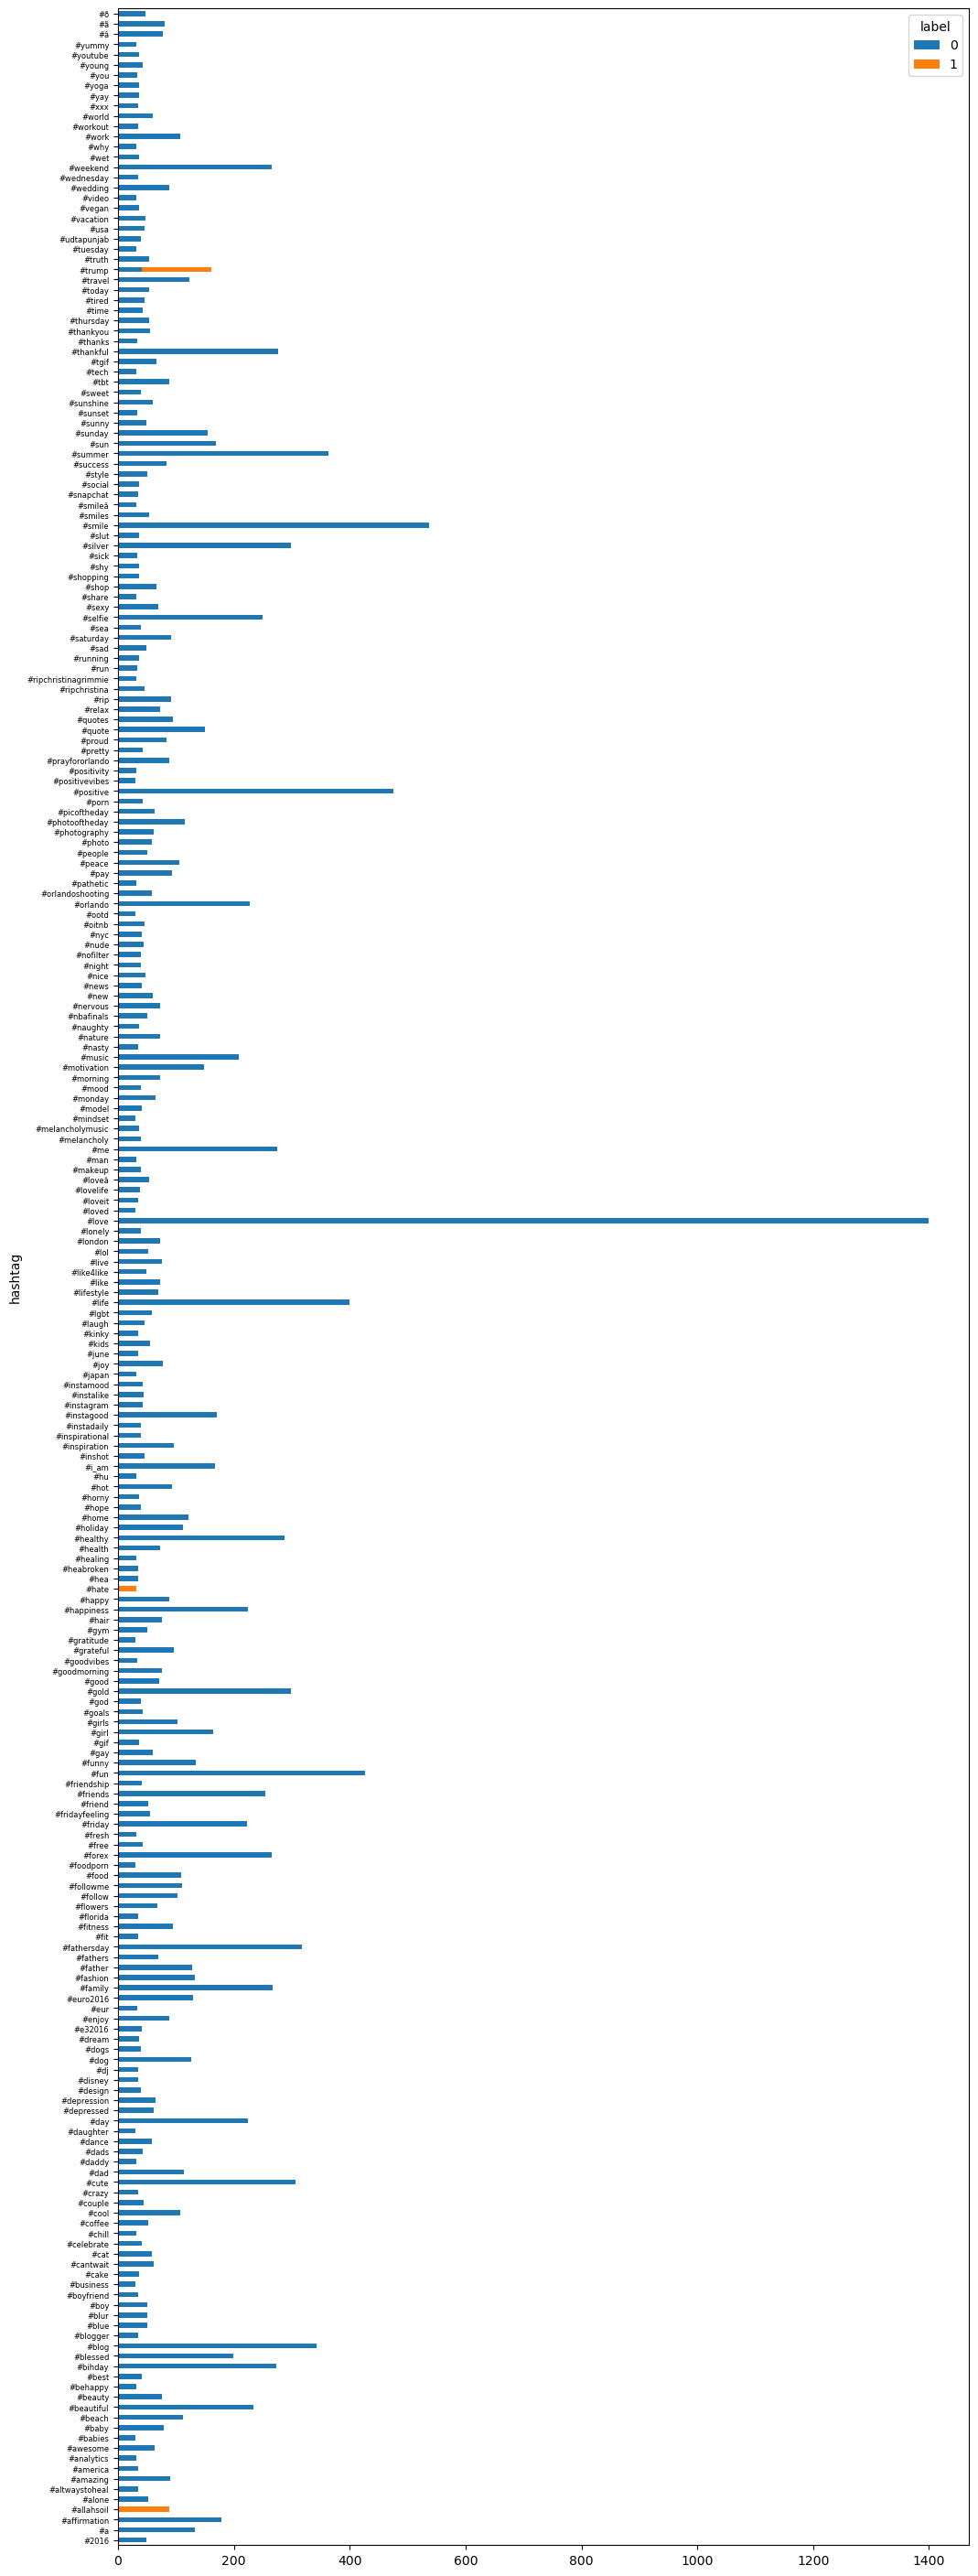

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


pivot_table = df_ht_count.pivot_table(index='hashtag',columns='label', values='count', aggfunc='sum')

ax = pivot_table.plot(kind='barh', stacked = True, figsize = (12,36))

ax.tick_params(axis='y', labelsize = 6)

In [ ]:
# Leider wenig Erkenntnis aus der Analyse nach Hashtag, wenig Hashtags mit Label = 1. Einziger Hashtag mit Label 0 & 1 in größerer Zahl: 'Trump'